# Data Cleaning:- 
### Aim: To find and handle incorrect data.
##### Incorrect data are one of the major factor causing obstruction in creating a model. So I am exploring incorrect data, understanding them and will find solutions to handle them.

## <font color='green'>1. Loading Dataset</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
missingvalues=["N/a", "na", np.nan] #to define missing values list
df =pd.read_csv(r'C:\Users\Fraud_Claim_training_data.csv', na_values=missingvalues)

In [3]:
print(df)

       claim_number  age_of_driver gender  marital_status  safty_rating  \
0                 1             46      M             1.0            85   
1                 3             21      F             0.0            75   
2                 4             49      F             0.0            87   
3                 5             58      F             1.0            58   
4                 6             38      M             1.0            95   
...             ...            ...    ...             ...           ...   
17993         29993             69      M             1.0            93   
17994         29996             35      F             0.0            22   
17995         29997             27      F             1.0            81   
17996         29999             52      F             1.0            86   
17997         30000             61      F             0.0            60   

       annual_income  high_education_ind  address_change_ind living_status  \
0              38301 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17998 entries, 0 to 17997
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_number             17998 non-null  int64  
 1   age_of_driver            17998 non-null  int64  
 2   gender                   17998 non-null  object 
 3   marital_status           17993 non-null  float64
 4   safty_rating             17998 non-null  int64  
 5   annual_income            17998 non-null  int64  
 6   high_education_ind       17998 non-null  int64  
 7   address_change_ind       17998 non-null  int64  
 8   living_status            17998 non-null  object 
 9   zip_code                 17998 non-null  int64  
 10  claim_date               17998 non-null  object 
 11  claim_day_of_week        17998 non-null  object 
 12  accident_site            17998 non-null  object 
 13  past_num_of_claims       17998 non-null  int64  
 14  witness_present_ind   

In [5]:
# Summary: Statistics of numerical variables
print("Statistics summary of numerical variables :- \n", df.describe())

Statistics summary of numerical variables :- 
        claim_number  age_of_driver  marital_status  safty_rating  \
count  17998.000000   17998.000000    17993.000000  17998.000000   
mean   14970.601622      43.695466        0.712722     73.562951   
std     8659.940765      11.959819        0.452505     15.346807   
min        1.000000      18.000000        0.000000      1.000000   
25%     7479.250000      35.000000        0.000000     65.000000   
50%    14965.500000      43.000000        1.000000     76.000000   
75%    22467.750000      51.000000        1.000000     85.000000   
max    30000.000000     229.000000        1.000000    100.000000   

       annual_income  high_education_ind  address_change_ind      zip_code  \
count   17998.000000        17998.000000        17998.000000  17998.000000   
mean    37367.655684            0.699189            0.577286  49894.766030   
std      2957.297249            0.458623            0.494004  29186.828369   
min        -1.000000        

##### Here we can see that 'age_of_driver' and 'annual_income' columns are having outliers.

## <font color='green'>2. Exploring Incorrect Data</font>
##### Types of Incorrect data: Incomplete/Missing Data, Inconsistent Data, Duplicate Data, Intentional Data and Outliers.

### <font color='blue'>2.1. Identifying Outliers</font>
##### An Outlier is that observation which is significantly different from all other observations.

<AxesSubplot:>

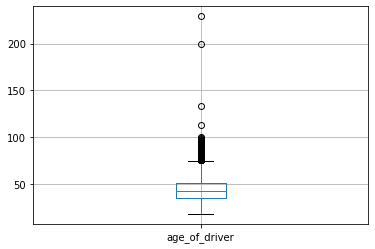

In [6]:
#2.1.1. Identifying Outliers in column 'age_of_driver'
df.boxplot(column ='age_of_driver', return_type='axes')

##### Age of a person who is eligible to drive a vehicle is minimum 18 and maximum could be 70 or 80 but as in the graph indicates it is 229, 200, 133, 113 which is certainly not possible. Hence indicates outliers in 'age_of_driver'.

<AxesSubplot:>

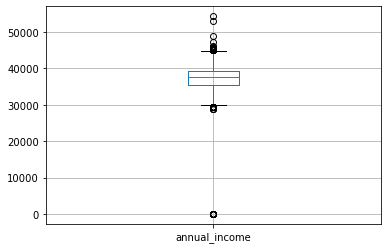

In [7]:
#2.1.2. Identifying Outliers in column 'annual_income'
df.boxplot(column ='annual_income', return_type='axes')

##### Annual income is always a positive quantity. But here it shows ‘-1’ which is certainly not possible. Hence indicates outliers in 'annual_income'.

### <font color='blue'>2.2. Identifying Missing or Incomplete Data</font>

In [8]:
df.isnull().sum()

claim_number                 0
age_of_driver                0
gender                       0
marital_status               5
safty_rating                 0
annual_income                0
high_education_ind           0
address_change_ind           0
living_status                0
zip_code                     0
claim_date                   0
claim_day_of_week            0
accident_site                0
past_num_of_claims           0
witness_present_ind        132
liab_prct                    0
channel                      0
policy_report_filed_ind      0
claim_est_payout            17
age_of_vehicle               0
vehicle_category             0
vehicle_price                0
vehicle_color                0
vehicle_weight               0
fraud                        0
dtype: int64

##### Here (1) marital_status have 5, (2) witness_present_ind have 132 and (3) claim_est_payout have 17 missing values in the dataset.

In [9]:
df.isnull().any() #True means having NAN values and False means No missing values

claim_number               False
age_of_driver              False
gender                     False
marital_status              True
safty_rating               False
annual_income              False
high_education_ind         False
address_change_ind         False
living_status              False
zip_code                   False
claim_date                 False
claim_day_of_week          False
accident_site              False
past_num_of_claims         False
witness_present_ind         True
liab_prct                  False
channel                    False
policy_report_filed_ind    False
claim_est_payout            True
age_of_vehicle             False
vehicle_category           False
vehicle_price              False
vehicle_color              False
vehicle_weight             False
fraud                      False
dtype: bool

## <font color='green'>3. Handling Incorrect Values</font>

### <font color='blue'>3.1. Removing Outliers</font>

##### Sometimes outliers indicate a mistake in data collection. But other times, they can influence a data set, so it’s important to keep them to better understand the dataset. So, instead of removing those outliers I am replacing them with Median values.

In [10]:
df1 = df.copy() #to make copy of raw dataset

### <font color='blue'>3.2. Replacing Outlliers</font>

In [11]:
#3.2.1. Finding the Median value for column 'age_of_driver'
median_age_driver=df1['age_of_driver'].median()
median_age_driver

43.0

In [12]:
#3.2.2. Replacing Outliers in column 'age_of_driver' for ages above 90 year with Median value  
df1['age_of_driver'] = np.where(df1['age_of_driver'] > 90.0, 43.0,df1['age_of_driver'])

<AxesSubplot:>

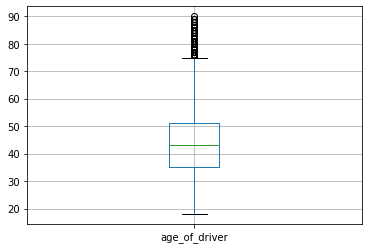

In [13]:
#3.2.3. Cross-check Outliers for column 'age_of_driver' after removal of outliers
df1.boxplot(column ='age_of_driver', return_type='axes')

In [14]:
#3.2.4. Finding the Median value for column 'annual_income'
median_annual_income=df1['annual_income'].median()
median_annual_income

37610.0

In [15]:
#3.2.5. Replacing Outliers in column 'annual_income' for income less than 10000 with Median value  
df1['annual_income'] = np.where(df1['annual_income'] < 10000.0, 37610.0,df1['annual_income'])

<AxesSubplot:>

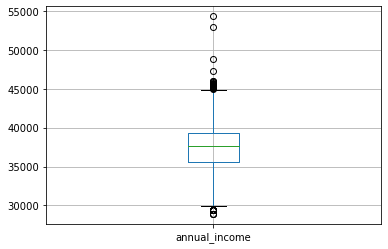

In [16]:
#3.2.6. Cross-check Outliers for column 'annual_income' after removal of outliers
df1.boxplot(column ='annual_income', return_type='axes')

In [17]:
# Summary: Statistics of numerical variables after Outliers removal (replacement)
print("Statistics summary of numerical variables after outliers removal:- \n", df1.describe())

Statistics summary of numerical variables after outliers removal:- 
        claim_number  age_of_driver  marital_status  safty_rating  \
count  17998.000000   17998.000000    17993.000000  17998.000000   
mean   14970.601622      43.605178        0.712722     73.562951   
std     8659.940765      11.659846        0.452505     15.346807   
min        1.000000      18.000000        0.000000      1.000000   
25%     7479.250000      35.000000        0.000000     65.000000   
50%    14965.500000      43.000000        1.000000     76.000000   
75%    22467.750000      51.000000        1.000000     85.000000   
max    30000.000000      90.000000        1.000000    100.000000   

       annual_income  high_education_ind  address_change_ind      zip_code  \
count   17998.000000        17998.000000        17998.000000  17998.000000   
mean    37399.001667            0.699189            0.577286  49894.766030   
std      2753.325082            0.458623            0.494004  29186.828369   
min   

### <font color='blue'>3.3. Replacing missing values with the Most Frequent value in categorical variables</font>

In [18]:
#3.3.1. Filling Missing Values in Column 'marital_status'
most_frequent1=df1['marital_status'].value_counts().idxmax()  #Finding the most frequent value
df1['marital_status'] = df1['marital_status'].fillna(value=most_frequent1) #Replacing NaN with most frequent value
#most_frequent1

In [19]:
#3.3.2. Filling Missing Values in Column 'witness_present_ind'
most_frequent2=df1['witness_present_ind'].value_counts().idxmax()
df1['witness_present_ind'] = df1['witness_present_ind'].fillna(value=most_frequent2)
#most_frequent2

### <font color='blue'>3.4. Replacing missing values with the Mean value in continuous variables</font>

In [20]:
#3.4.1. Filling Missing Values in Column 'claim_est_payout'
mean_value1=df1['claim_est_payout'].mean() #Finding the mean value
df1['claim_est_payout'] = df1['claim_est_payout'].fillna(value=mean_value1) #Replacing NaNs with mean value
#mean_value1

### Now, we can compare both 'df' (original dataset) and 'df1' dataset.

In [21]:
df.isnull().sum() #raw dataset

claim_number                 0
age_of_driver                0
gender                       0
marital_status               5
safty_rating                 0
annual_income                0
high_education_ind           0
address_change_ind           0
living_status                0
zip_code                     0
claim_date                   0
claim_day_of_week            0
accident_site                0
past_num_of_claims           0
witness_present_ind        132
liab_prct                    0
channel                      0
policy_report_filed_ind      0
claim_est_payout            17
age_of_vehicle               0
vehicle_category             0
vehicle_price                0
vehicle_color                0
vehicle_weight               0
fraud                        0
dtype: int64

In [22]:
df1.isnull().sum() #cleaned dataset

claim_number               0
age_of_driver              0
gender                     0
marital_status             0
safty_rating               0
annual_income              0
high_education_ind         0
address_change_ind         0
living_status              0
zip_code                   0
claim_date                 0
claim_day_of_week          0
accident_site              0
past_num_of_claims         0
witness_present_ind        0
liab_prct                  0
channel                    0
policy_report_filed_ind    0
claim_est_payout           0
age_of_vehicle             0
vehicle_category           0
vehicle_price              0
vehicle_color              0
vehicle_weight             0
fraud                      0
dtype: int64

In [23]:
df.describe() #raw dataset

,claim_number,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud
count,17998.000000,17998.000000,17993.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17866.000000,17998.000000,17998.000000,17981.000000,17998.000000,17998.000000,17998.000000,17998.000000
mean,14970.601622,43.695466,0.712722,73.562951,37367.655684,0.699189,0.577286,49894.766030,0.505001,0.232677,49.423269,0.600678,4975.792083,5.034504,23089.123114,23031.322385,0.156462
std,8659.940765,11.959819,0.452505,15.346807,2957.297249,0.458623,0.494004,29186.828369,0.955504,0.422550,33.678470,0.489773,2215.706510,2.221716,11988.429767,12052.385584,0.363303
min,1.000000,18.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,15001.000000,0.000000,0.000000,0.000000,0.000000,282.639432,1.000000,2457.329316,2429.429302,0.000000
25%,7479.250000,35.000000,0.000000,65.000000,35554.000000,0.000000,0.000000,20111.000000,0.000000,0.000000,17.000000,0.000000,3337.029436,3.000000,14279.574850,14164.122133,0.000000
50%,14965.500000,43.000000,1.000000,76.000000,37610.000000,1.000000,1.000000,50028.000000,0.000000,0.000000,50.000000,1.000000,4668.796318,5.000000,20948.879250,20838.150260,0.000000
75%,22467.750000,51.000000,1.000000,85.000000,39318.000000,1.000000,1.000000,80038.000000,1.000000,0.000000,81.000000,1.000000,6255.901066,6.000000,29562.232780,29430.446293,0.000000
max,30000.000000,229.000000,1.000000,100.000000,54333.000000,1.000000,1.000000,85083.000000,6.000000,1.000000,100.000000,1.000000,17218.345010,16.000000,127063.506000,123016.650400,1.000000


In [24]:
df1.describe() #cleaned dataset

,claim_number,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud
count,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000
mean,14970.601622,43.605178,0.712801,73.562951,37399.001667,0.699189,0.577286,49894.766030,0.505001,0.230970,49.423269,0.600678,4975.792083,5.034504,23089.123114,23031.322385,0.156462
std,8659.940765,11.659846,0.452468,15.346807,2753.325082,0.458623,0.494004,29186.828369,0.955504,0.421465,33.678470,0.489773,2214.659783,2.221716,11988.429767,12052.385584,0.363303
min,1.000000,18.000000,0.000000,1.000000,28896.000000,0.000000,0.000000,15001.000000,0.000000,0.000000,0.000000,0.000000,282.639432,1.000000,2457.329316,2429.429302,0.000000
25%,7479.250000,35.000000,0.000000,65.000000,35555.000000,0.000000,0.000000,20111.000000,0.000000,0.000000,17.000000,0.000000,3339.205052,3.000000,14279.574850,14164.122133,0.000000
50%,14965.500000,43.000000,1.000000,76.000000,37610.000000,1.000000,1.000000,50028.000000,0.000000,0.000000,50.000000,1.000000,4671.827763,5.000000,20948.879250,20838.150260,0.000000
75%,22467.750000,51.000000,1.000000,85.000000,39318.000000,1.000000,1.000000,80038.000000,1.000000,0.000000,81.000000,1.000000,6254.708103,6.000000,29562.232780,29430.446293,0.000000
max,30000.000000,90.000000,1.000000,100.000000,54333.000000,1.000000,1.000000,85083.000000,6.000000,1.000000,100.000000,1.000000,17218.345010,16.000000,127063.506000,123016.650400,1.000000


In [25]:
#df1.to_csv('FC_training_data_cleaned.csv')

##### There is no Inconsistent, Duplicate, and Intentional Data in the dataset.
##### Now, this dataset is completely clean.